Q1) a) Calculate pmf of Histogram store it in 'hist_pmf'.

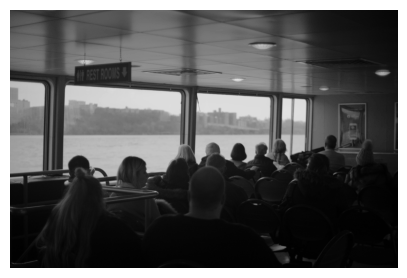

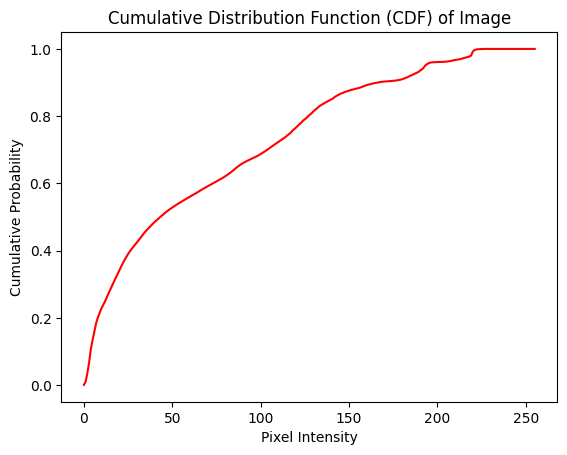

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load the image and convert it to grayscale
img0 = cv.imread('people_lowlight.jpg')
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# Display the image
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# Flatten the image
img_flat = img.ravel()

# Calculate the histogram
hist, bins = np.histogram(img_flat, 256, [0, 256])

# Calculate the probability mass function (PMF)
pmf = hist / img_flat.size

# Calculate the cumulative distribution function (CDF)
cdf = np.cumsum(pmf)

# Plot the CDF
plt.plot(bins[:-1], cdf, color='r')
plt.title('Cumulative Distribution Function (CDF) of Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Cumulative Probability')
plt.show()



b) Calculate cdf of that pmf and store it in 'hist_cdf'.

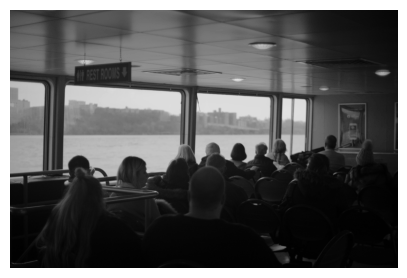

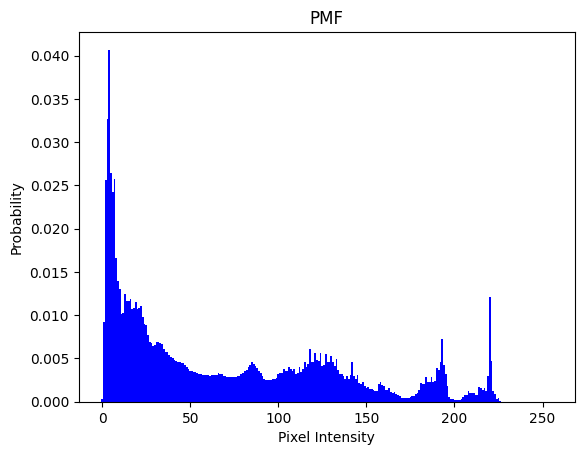

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load the image and convert it to grayscale
img0 = cv.imread('people_lowlight.jpg')
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# Display the image
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

# Flatten the image
img_flat = img.ravel()

# Calculate the histogram
hist, bins = np.histogram(img_flat, 256, [0, 256])

# Calculate the probability mass function (PMF)
pmf = hist / img_flat.size

# Plot the PMF
plt.bar(bins[:-1], pmf, color='b', width=1)
plt.title('PMF')
plt.xlabel('Pixel Intensity')
plt.ylabel('Probability')
plt.show()


Q2) Calculate T(r)

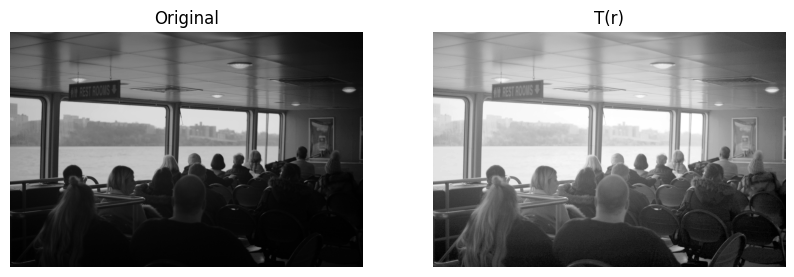

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load the image and convert it to grayscale
img0 = cv.imread('people_lowlight.jpg')
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# Display the original and equalized images side by side
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Original')

# Flatten the image
img_flat = img.ravel()

# Calculate the histogram
hist, bins = np.histogram(img_flat, 256, [0, 256])

# Calculate the probability mass function (PMF)
pmf = hist / img_flat.size

# Calculate the cumulative distribution function (CDF)
cdf = np.cumsum(pmf)

# Calculate the transformation function T(r)
L = 256  # Number of intensity levels
T = np.round((L - 1) * cdf).astype('uint8')  # Corrected line

# Apply histogram equalization using T(r)
img_equalized = T[img]

# Equalized Image
plt.subplot(1, 2, 2)
plt.imshow(img_equalized, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('T(r)')

plt.show()


Q3) Apply T(r) on input image

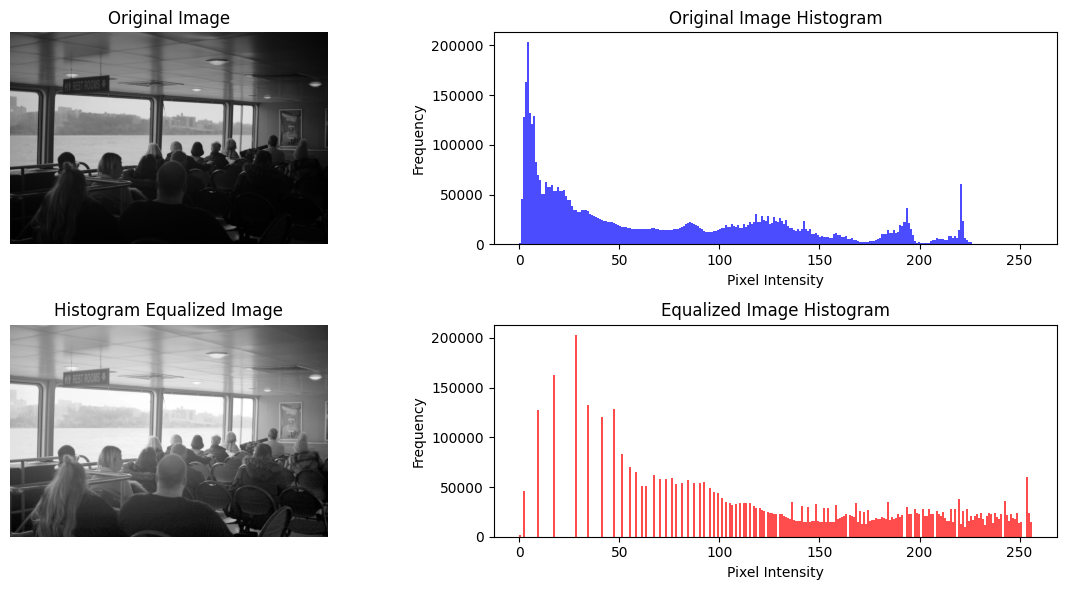

In [6]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Load the image and convert it to grayscale
img0 = cv.imread('people_lowlight.jpg')
img = cv.cvtColor(img0, cv.COLOR_BGR2GRAY)

# Display the original and equalized images with histograms
plt.figure(figsize=(12, 6))

img_flat = img.ravel()

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Original Image')

# Original Image Histogram
plt.subplot(2, 2, 2)
plt.hist(img_flat, bins=256, range=[0, 256], color='blue', alpha=0.7)
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

# Calculate the histogram
hist, bins = np.histogram(img_flat, 256, [0, 256])

# Calculate the probability mass function (PMF)
pmf = hist / img_flat.size

# Calculate the cumulative distribution function (CDF)
cdf = np.cumsum(pmf)

# Calculate the transformation function T(r)
L = 256  # Number of intensity levels
T = np.round((L - 1) * cdf).astype('uint8')  # Corrected line

# Apply histogram equalization using T(r)
img_equalized = T[img]

# Equalized Image
plt.subplot(2, 2, 3)
plt.imshow(img_equalized, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.title('Histogram Equalized Image')

# Equalized Image Histogram
plt.subplot(2, 2, 4)
plt.hist(img_equalized.ravel(), bins=256, range=[0, 256], color='red', alpha=0.7)
plt.title('Equalized Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Q4) Implement Histogram matching by CDF based transformation function.

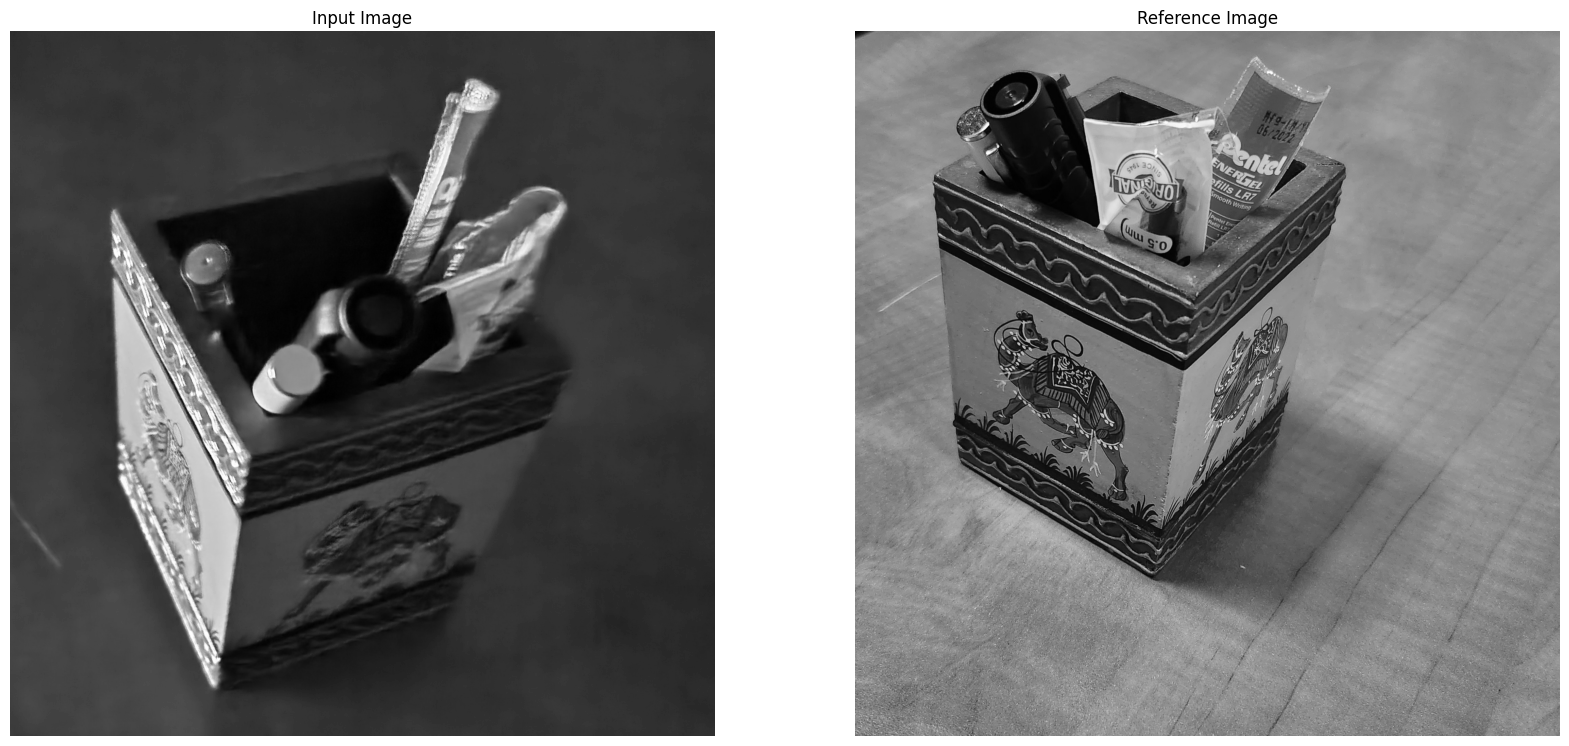

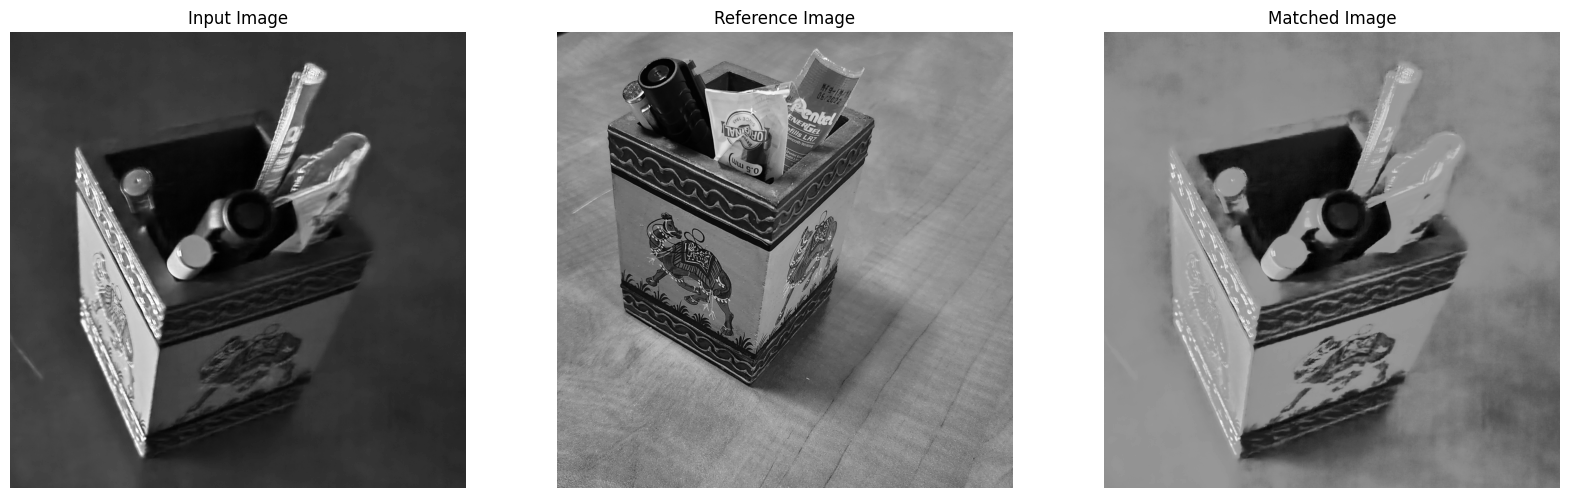

In [7]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

# Load the reference and input images
ref0 = cv.imread('penstand_bright.jpg')
ref = cv.cvtColor(ref0, cv.COLOR_BGR2GRAY)

inp0 = cv.imread('penstand_lowlight2.jpg')
inp = cv.cvtColor(inp0, cv.COLOR_BGR2GRAY)

# Display the reference and input images
plt.figure(figsize=(20, 20))
plt.subplot(121)
plt.imshow(inp, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(ref, cmap='gray', vmin=0, vmax=255)
plt.title('Reference Image')
plt.axis('off')

plt.show()

# Histogram matching
def histogram_matching(input_image, reference_image):
    matched_image = np.zeros_like(input_image)

    # Calculate histograms
    hist_input, bins_input = np.histogram(input_image.flatten(), 256, [0, 256])
    hist_ref, bins_ref = np.histogram(reference_image.flatten(), 256, [0, 256])

    # Calculate cumulative distribution functions (CDF)
    cdf_input = np.cumsum(hist_input) / np.sum(hist_input)
    cdf_ref = np.cumsum(hist_ref) / np.sum(hist_ref)

    # Match histograms
    for i in range(256):
        idx = np.argmin(np.abs(cdf_input[i] - cdf_ref))
        matched_image[input_image == i] = idx

    return matched_image

# Perform histogram matching
matched_image = histogram_matching(inp, ref)

# Display the original input, reference, and matched images
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(inp, cmap='gray', vmin=0, vmax=255)
plt.title('Input Image')
plt.axis('off')

plt.subplot(132)
plt.imshow(ref, cmap='gray', vmin=0, vmax=255)
plt.title('Reference Image')
plt.axis('off')

plt.subplot(133)
plt.imshow(matched_image, cmap='gray', vmin=0, vmax=255)
plt.title('Matched Image')
plt.axis('off')

plt.show()


Q5) Verification with 'match_histogram' function in skimage.exposure

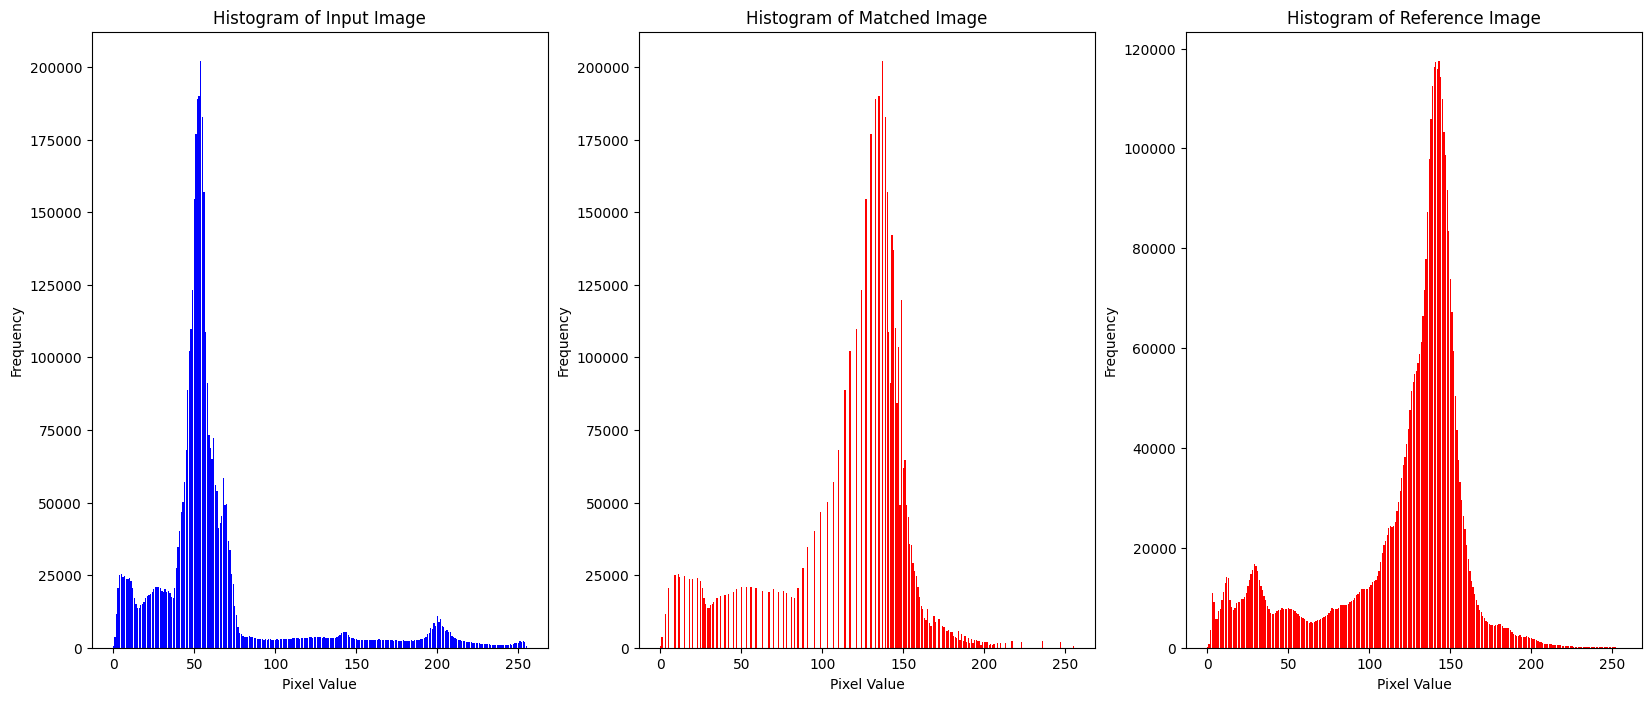

In [8]:
import cv2 as cv
import numpy as np
from skimage.exposure import match_histograms
from matplotlib import pyplot as plt

# Load the reference and input images
ref0 = cv.imread('penstand_bright.jpg')
ref = cv.cvtColor(ref0, cv.COLOR_BGR2GRAY)

inp0 = cv.imread('penstand_lowlight2.jpg')
inp = cv.cvtColor(inp0, cv.COLOR_BGR2GRAY)

# Perform histogram matching using match_histograms
matched = match_histograms(inp, ref)

# Calculate histograms for the input, matched, and reference images
hist_inp, bins_inp = np.histogram(inp.ravel(), 256, [0, 256])
hist_matched, bins_matched = np.histogram(matched.ravel(), 256, [0, 256])
hist_ref, bins_ref = np.histogram(ref.ravel(), 256, [0, 256])

# Display three histograms side by side
plt.figure(figsize=(20, 8))

plt.subplot(131)
plt.bar(bins_inp[:-1], hist_inp, color='b')
plt.title('Histogram of Input Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.bar(bins_matched[:-1], hist_matched, color='r')
plt.title('Histogram of Matched Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.bar(bins_ref[:-1], hist_ref, color='r')
plt.title('Histogram of Reference Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.show()
